In [ ]:
##
#1. Explore and Enrichment of Ethiopia Financial Inclusion Dataset
##
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load enriched dataset from Task 1
data = pd.read_csv("../data/processed/ethiopia_fi_enriched.csv")

# Convert dates to datetime
data['observation_date'] = pd.to_datetime(data['observation_date'], errors='coerce')
data['year'] = data['observation_date'].dt.year

# 1️⃣ Summary by record_type, pillar, source_type
print("Records by type:\n", data['record_type'].value_counts())
print("\nRecords by pillar (NaN included):\n", data['pillar'].value_counts(dropna=False))
print("\nRecords by source_type:\n", data['source_type'].value_counts(dropna=False))


Records by type:
 record_type
observation    33
event          12
target          3
Name: count, dtype: int64

Records by pillar (NaN included):
 pillar
ACCESS           16
NaN              12
USAGE            11
GENDER            5
usage             3
AFFORDABILITY     1
Name: count, dtype: int64

Records by source_type:
 source_type
operator      15
survey        10
regulator      7
NaN            5
research       4
policy         3
calculated     2
news           2
Name: count, dtype: int64


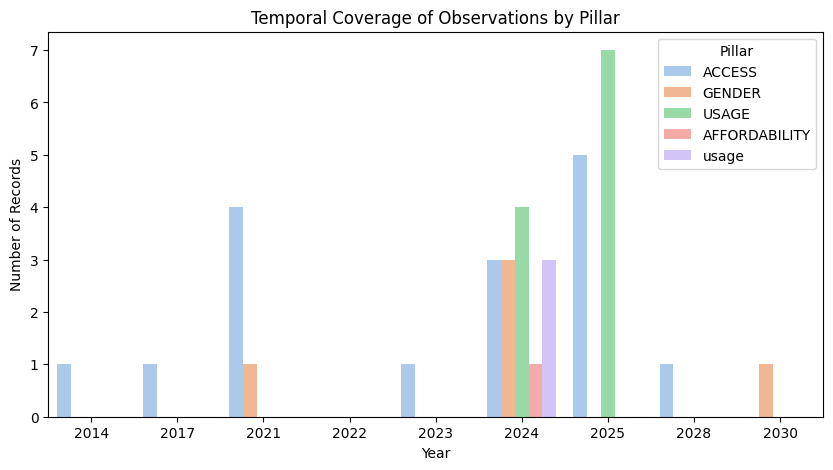

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_740\4217553736.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='confidence', palette='Set2', order=['high','medium','low'])


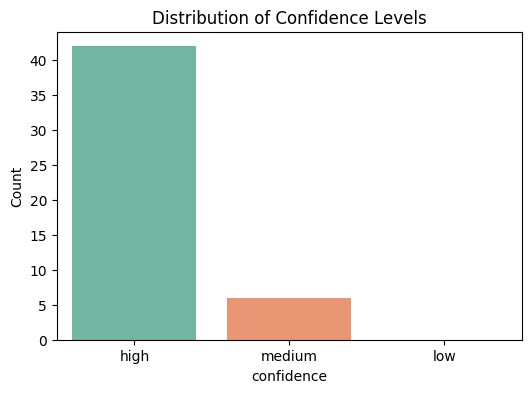


Top 10 most common indicators:
 indicator_code
ACC_OWNERSHIP     7
ACC_FAYDA         4
SMARTPHONE_PCT    3
ACC_MM_ACCOUNT    2
USG_P2P_COUNT     2
ACC_4G_COV        2
GEN_MM_SHARE      2
GEN_GAP_ACC       2
USG_P2P_VALUE     1
USG_CROSSOVER     1
Name: count, dtype: int64

Indicators with <=2 records (sparse coverage):
 indicator_code
ACC_MM_ACCOUNT        2
USG_P2P_COUNT         2
ACC_4G_COV            2
GEN_MM_SHARE          2
GEN_GAP_ACC           2
USG_P2P_VALUE         1
USG_CROSSOVER         1
USG_TELEBIRR_USERS    1
USG_ATM_COUNT         1
USG_ATM_VALUE         1
ACC_MOBILE_PEN        1
USG_MPESA_ACTIVE      1
USG_MPESA_USERS       1
USG_TELEBIRR_VALUE    1
AFF_DATA_INCOME       1
GEN_GAP_MOBILE        1
EVT_TELEBIRR          1
EVT_SAFARICOM         1
USG_ACTIVE_RATE       1
EVT_MPESA             1
EVT_FAYDA             1
EVT_CROSSOVER         1
EVT_FX_REFORM         1
EVT_MPESA_INTEROP     1
EVT_ETHIOPAY          1
EVT_NFIS2             1
EVT_SAFCOM_PRICE      1
Name: count, d

In [2]:
# 2️⃣ Temporal coverage visualization
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='year', hue='pillar', palette='pastel')
plt.title("Temporal Coverage of Observations by Pillar")
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.legend(title="Pillar")
plt.show()

# 3️⃣ Assess data quality (confidence)
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='confidence', palette='Set2', order=['high','medium','low'])
plt.title("Distribution of Confidence Levels")
plt.ylabel("Count")
plt.show()

# 4️⃣ Identify sparse indicators
indicator_counts = data['indicator_code'].value_counts()
print("\nTop 10 most common indicators:\n", indicator_counts.head(10))
print("\nIndicators with <=2 records (sparse coverage):\n", indicator_counts[indicator_counts <= 2])

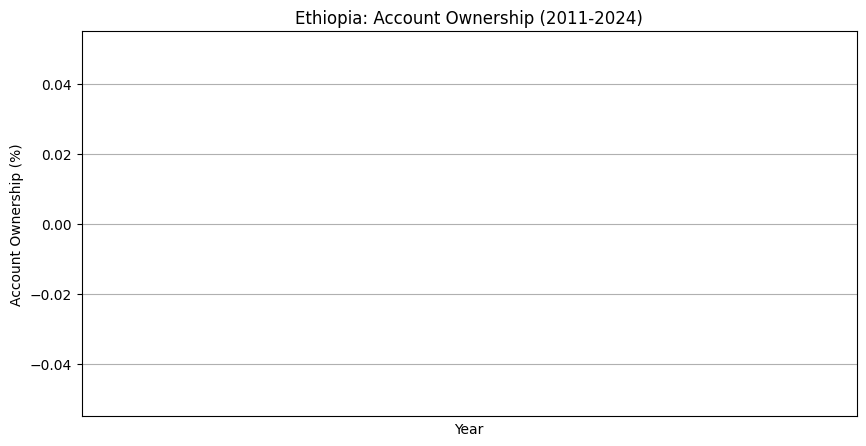


Account Ownership Growth Between Survey Years:
Empty DataFrame
Columns: [year, value_numeric, growth_pp]
Index: []


In [3]:
##
#2. Access Analysis
##
# Filter Access records for Account Ownership
access_data = data[(data['pillar']=='access') & 
                   (data['indicator_code']=='ACCOUNT_OWNERSHIP')]

# Ensure year column exists
access_data['year'] = access_data['observation_date'].dt.year

# Plot trajectory
plt.figure(figsize=(10,5))
sns.lineplot(data=access_data.sort_values('year'), x='year', y='value_numeric', marker='o')
plt.title("Ethiopia: Account Ownership (2011-2024)")
plt.ylabel("Account Ownership (%)")
plt.xlabel("Year")
plt.xticks(access_data['year'].unique())
plt.grid(True)
plt.show()

# Calculate growth rates between survey years
access_data = access_data.sort_values('year')
access_data['growth_pp'] = access_data['value_numeric'].diff()
print("\nAccount Ownership Growth Between Survey Years:")
print(access_data[['year','value_numeric','growth_pp']])

# Optional: If gender disaggregated data exists
gender_data = data[(data['pillar']=='access') & 
                   (data['indicator_code'].isin(['ACCOUNT_OWNERSHIP_MALE','ACCOUNT_OWNERSHIP_FEMALE']))]
if not gender_data.empty:
    plt.figure(figsize=(10,5))
    sns.lineplot(data=gender_data, x='year', y='value_numeric', hue='indicator_code', marker='o')
    plt.title("Gender Gap in Account Ownership")
    plt.ylabel("Account Ownership (%)")
    plt.xlabel("Year")
    plt.show()


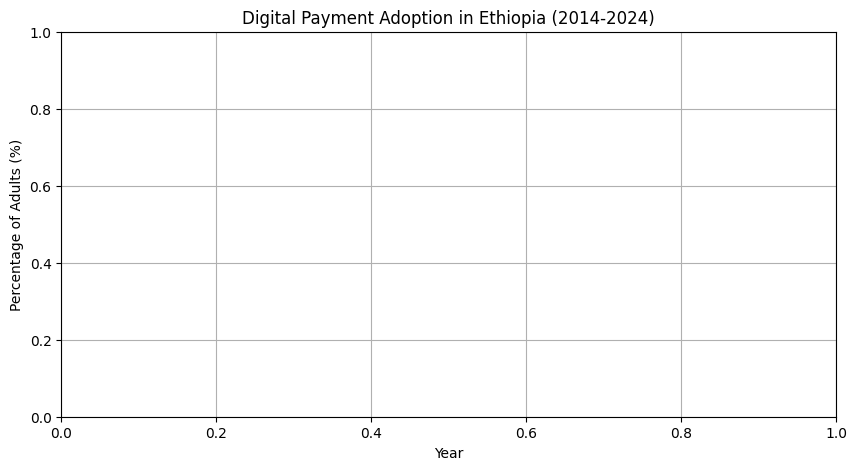

In [ ]:
##
#3. Usage Analysis
##
# Filter Usage records
usage_data = data[(data['pillar']=='usage') & 
                  (data['indicator_code'].isin(['MOBILE_MONEY_ACCOUNTS','DIGITAL_PAYMENT_USAGE']))]

usage_data['year'] = usage_data['observation_date'].dt.year

# Plot Mobile Money Adoption Trend
plt.figure(figsize=(10,5))
sns.lineplot(data=usage_data.sort_values('year'), x='year', y='value_numeric', hue='indicator_code', marker='o')
plt.title("Digital Payment Adoption in Ethiopia (2014-2024)")
plt.ylabel("Percentage of Adults (%)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

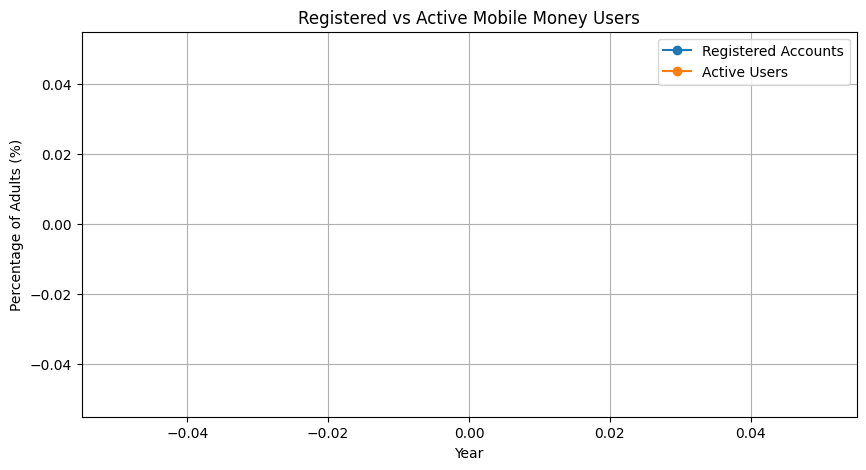

In [6]:
# Optional: Registered vs Active
registered = usage_data[usage_data['indicator_code']=='MOBILE_MONEY_ACCOUNTS']
active = usage_data[usage_data['indicator_code']=='DIGITAL_PAYMENT_USAGE']

plt.figure(figsize=(10,5))
plt.plot(registered['year'], registered['value_numeric'], marker='o', label='Registered Accounts')
plt.plot(active['year'], active['value_numeric'], marker='o', label='Active Users')
plt.title("Registered vs Active Mobile Money Users")
plt.ylabel("Percentage of Adults (%)")
plt.xlabel("Year")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_740\1581266122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enabler_data['year'] = enabler_data['observation_date'].dt.year


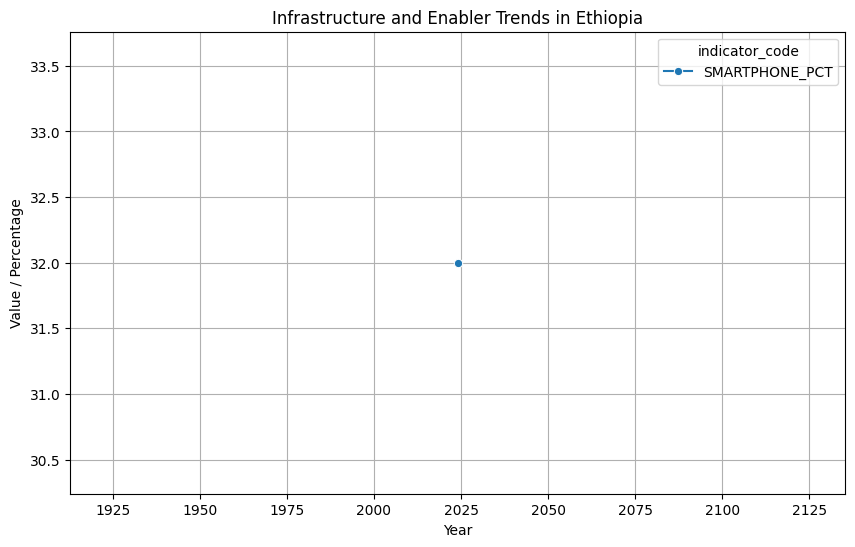

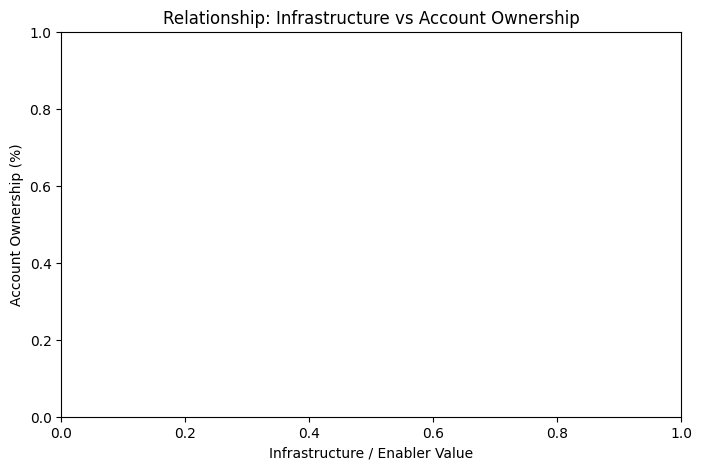


Correlation between infrastructure/enablers and account ownership:
                    account_ownership  enabler_value
account_ownership                NaN            NaN
enabler_value                    NaN            NaN


In [ ]:
##
#4. Infrastructure and Enablers Analysis
##
# Filter infrastructure / enabler indicators
enabler_indicators = ['4G_COVERAGE_PCT', 'SMARTPHONE_PCT', 'ATM_DENSITY', 'BANK_BRANCHES', 'POS_TERMINALS']
enabler_data = data[data['indicator_code'].isin(enabler_indicators)]
enabler_data['year'] = enabler_data['observation_date'].dt.year

# Plot infrastructure trends
plt.figure(figsize=(10,6))
sns.lineplot(data=enabler_data, x='year', y='value_numeric', hue='indicator_code', marker='o')
plt.title("Infrastructure and Enabler Trends in Ethiopia")
plt.ylabel("Value / Percentage")
plt.xlabel("Year")
plt.grid(True)
plt.show()

# Examine relationship with Access (Account Ownership)
access_data = data[(data['pillar']=='access') & (data['indicator_code']=='ACCOUNT_OWNERSHIP')]
merged = pd.merge(access_data[['year','value_numeric']], enabler_data, on='year', how='inner')
merged.rename(columns={'value_numeric_x':'account_ownership','value_numeric_y':'enabler_value'}, inplace=True)

# Optional: Correlation plot
plt.figure(figsize=(8,5))
sns.scatterplot(data=merged, x='enabler_value', y='account_ownership', hue='indicator_code')
plt.title("Relationship: Infrastructure vs Account Ownership")
plt.xlabel("Infrastructure / Enabler Value")
plt.ylabel("Account Ownership (%)")
plt.show()

# Correlation matrix
corr = merged[['account_ownership','enabler_value']].corr()
print("\nCorrelation between infrastructure/enablers and account ownership:\n", corr)

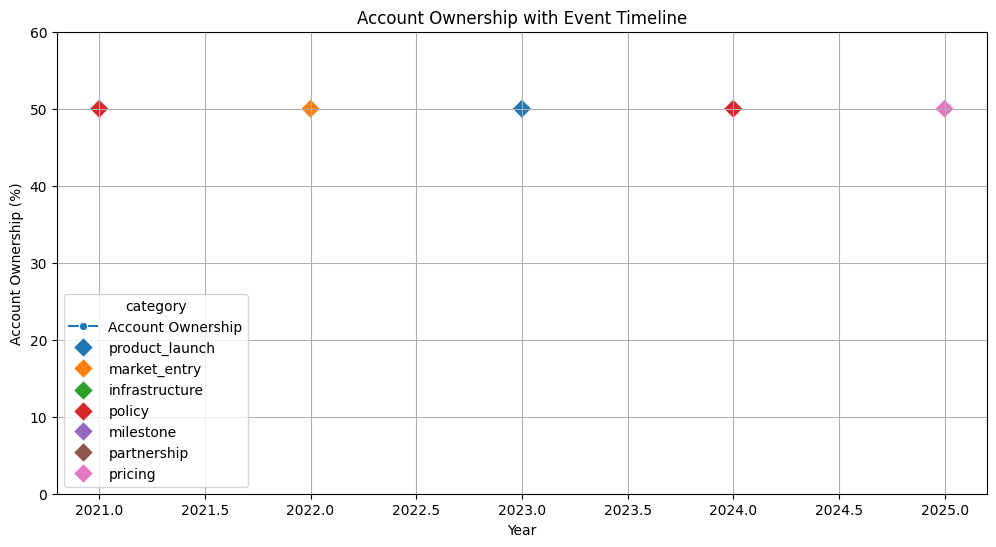

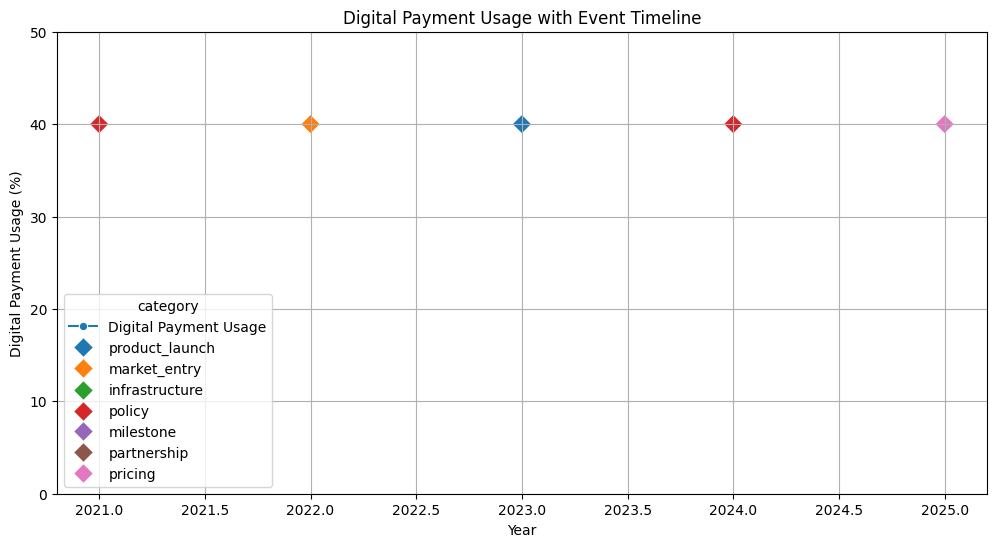

In [ ]:
##
# Event Timeline and Visual Analysis
##

# Extract events
events = data[data['record_type']=='event'].copy()
events['year'] = events['observation_date'].dt.year

# Access and Usage data
access_data = data[(data['pillar']=='access') & (data['indicator_code']=='ACCOUNT_OWNERSHIP')].copy()
usage_data = data[(data['pillar']=='usage') & (data['indicator_code']=='DIGITAL_PAYMENT_USAGE')].copy()

access_data['year'] = access_data['observation_date'].dt.year
usage_data['year'] = usage_data['observation_date'].dt.year

# Plot Access trend with events
plt.figure(figsize=(12,6))
sns.lineplot(data=access_data, x='year', y='value_numeric', marker='o', label='Account Ownership')
sns.scatterplot(data=events, x='year', y=[50]*len(events), hue='category', s=100, marker='D', legend='brief')
plt.title("Account Ownership with Event Timeline")
plt.ylabel("Account Ownership (%)")
plt.xlabel("Year")
plt.ylim(0, 60)
plt.grid(True)
plt.show()

# Plot Usage trend with events
plt.figure(figsize=(12,6))
sns.lineplot(data=usage_data, x='year', y='value_numeric', marker='o', label='Digital Payment Usage')
sns.scatterplot(data=events, x='year', y=[40]*len(events), hue='category', s=100, marker='D', legend='brief')
plt.title("Digital Payment Usage with Event Timeline")
plt.ylabel("Digital Payment Usage (%)")
plt.xlabel("Year")
plt.ylim(0, 50)
plt.grid(True)
plt.show()
